In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Configuration ---
DATA_CSV_FILE = 'landmark_data_raw.csv'
LABEL_MAP_FILE = 'label_map.pkl'
TEST_SIZE = 0.2
RANDOM_STATE = 42

In [3]:
# --- Load Data using Pandas ---
try:
    df = pd.read_csv(DATA_CSV_FILE)
    print(f"Data loaded successfully from {DATA_CSV_FILE}")
    print(f"Original shape of loaded data: {df.shape}")
    # print(df.head())
except FileNotFoundError:
    print(f"Error: Data file '{DATA_CSV_FILE}' not found. Please run the modified Step 1 first.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

Data loaded successfully from landmark_data_raw.csv
Original shape of loaded data: (4800, 43)


Data Loading

In [4]:
# Loading the Data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("landmark_data_raw.csv")

In [5]:
# Making sure the data is successfully loaded
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,0.289121,0.718560,0.374544,0.692577,0.444009,0.593188,0.460589,0.479829,0.458094,0.407111,0.399843,0.493833,0.399298,0.422946,0.391206,0.508950,0.393612,0.529801,0.347731,0.490420,0.344304,0.420656,0.346126,0.522683,0.349120,0.528901,0.300279,0.495007,0.296370,0.427989,0.302421,0.523891,0.307402,0.537825,0.249812,0.501909,0.248582,0.453278,0.258325,0.517810,0.262962,0.536214,A
1,0.290562,0.721189,0.374717,0.689924,0.441903,0.591824,0.459046,0.478915,0.455313,0.405138,0.396435,0.494253,0.396879,0.422591,0.390223,0.509145,0.392272,0.530353,0.345356,0.490985,0.343608,0.422749,0.345458,0.525072,0.348121,0.528350,0.297620,0.495587,0.295897,0.428838,0.302577,0.524018,0.307303,0.536158,0.246557,0.502255,0.248061,0.454032,0.258728,0.517482,0.263045,0.535774,A
2,0.289598,0.724303,0.372772,0.692388,0.440556,0.592042,0.458150,0.477888,0.453076,0.403817,0.394949,0.492678,0.396872,0.419529,0.390047,0.508890,0.391444,0.527927,0.342381,0.490588,0.341990,0.423135,0.344362,0.528898,0.347350,0.527360,0.293912,0.495533,0.292713,0.429786,0.299825,0.526248,0.304884,0.533632,0.243218,0.501302,0.244995,0.456232,0.254367,0.519955,0.256954,0.534667,A
3,0.411537,0.713150,0.496581,0.661524,0.553116,0.538058,0.551704,0.413193,0.541443,0.337676,0.496999,0.443861,0.493349,0.371679,0.497936,0.469793,0.497069,0.483265,0.441226,0.456838,0.439373,0.389351,0.455114,0.503107,0.452603,0.497364,0.391773,0.478427,0.389479,0.413144,0.408569,0.521227,0.406360,0.526262,0.337500,0.497969,0.342678,0.457288,0.360679,0.526823,0.358453,0.539253,A
4,0.411421,0.705736,0.496924,0.659478,0.553611,0.535853,0.552943,0.411359,0.542338,0.335861,0.496322,0.444014,0.492465,0.371617,0.495835,0.469500,0.495860,0.483824,0.441165,0.457511,0.438366,0.387776,0.453233,0.499932,0.451378,0.495991,0.392475,0.479142,0.388536,0.412427,0.406854,0.517383,0.405777,0.524125,0.338779,0.496874,0.339682,0.455313,0.357911,0.522948,0.357706,0.535978,A


Data Exploration

In [6]:
# Understanding the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4800 non-null   float64
 1   y1      4800 non-null   float64
 2   x2      4800 non-null   float64
 3   y2      4800 non-null   float64
 4   x3      4800 non-null   float64
 5   y3      4800 non-null   float64
 6   x4      4800 non-null   float64
 7   y4      4800 non-null   float64
 8   x5      4800 non-null   float64
 9   y5      4800 non-null   float64
 10  x6      4800 non-null   float64
 11  y6      4800 non-null   float64
 12  x7      4800 non-null   float64
 13  y7      4800 non-null   float64
 14  x8      4800 non-null   float64
 15  y8      4800 non-null   float64
 16  x9      4800 non-null   float64
 17  y9      4800 non-null   float64
 18  x10     4800 non-null   float64
 19  y10     4800 non-null   float64
 20  x11     4800 non-null   float64
 21  y11     4800 non-null   float64
 22  

In [7]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,0.384575,0.707014,0.435075,0.665773,0.456168,0.584572,0.438374,0.524163,0.409565,0.499922,0.416137,0.495646,0.411913,0.430300,0.406157,0.430712,0.398752,0.429244,0.377297,0.500516,0.374133,0.440690,0.380372,0.462109,0.382717,0.461884,0.344635,0.519773,0.343080,0.470633,0.362847,0.511959,0.371536,0.529580,0.315017,0.549066,0.318453,0.506607,0.336113,0.526571,0.343966,0.537028
std,0.127700,0.103920,0.119595,0.089188,0.118977,0.063977,0.124909,0.066493,0.137142,0.086020,0.116256,0.066165,0.127631,0.078392,0.137069,0.104011,0.146169,0.136112,0.109785,0.068464,0.113742,0.089210,0.116082,0.115364,0.120417,0.144029,0.106765,0.075027,0.106147,0.095788,0.108177,0.108780,0.109978,0.125460,0.108083,0.084295,0.108417,0.098125,0.112615,0.112102,0.115710,0.128664
min,0.157814,0.240793,0.216442,0.300103,0.251905,0.350510,0.220145,0.315862,0.187186,0.252778,0.220138,0.281765,0.143610,0.221527,0.098647,0.221223,0.055872,0.181558,0.190655,0.289675,0.134850,0.198447,0.078671,0.205937,0.029228,0.158044,0.141168,0.313392,0.129319,0.176087,0.150988,0.193125,0.157874,0.202157,0.089158,0.318477,0.082833,0.206438,0.067783,0.211482,0.044696,0.213527
25%,0.283784,0.684665,0.340241,0.637557,0.365606,0.552427,0.347277,0.483643,0.305040,0.448946,0.332202,0.446129,0.317797,0.380867,0.313298,0.349325,0.307762,0.308213,0.294310,0.463151,0.281512,0.381387,0.305207,0.361398,0.306644,0.336133,0.260052,0.481932,0.260405,0.412238,0.286635,0.452291,0.289847,0.475821,0.232708,0.499293,0.239100,0.444141,0.252316,0.449122,0.259558,0.472947
50%,0.375900,0.729493,0.428912,0.688409,0.448276,0.596233,0.421467,0.532572,0.386831,0.498120,0.395520,0.501408,0.400560,0.419620,0.394391,0.421905,0.386364,0.440593,0.362523,0.503120,0.360198,0.427022,0.366856,0.479743,0.377780,0.499950,0.329811,0.523004,0.326695,0.460822,0.357273,0.534121,0.371819,0.564499,0.299071,0.553747,0.304853,0.512348,0.334654,0.545282,0.343867,0.562214
75%,0.472674,0.766679,0.504256,0.718052,0.532916,0.631508,0.522051,0.569544,0.483667,0.555519,0.500043,0.539130,0.489983,0.468243,0.490017,0.501825,0.496794,0.533514,0.458895,0.540765,0.448380,0.502349,0.460577,0.541242,0.462304,0.562973,0.415068,0.566469,0.424711,0.531066,0.446497,0.588267,0.444229,0.623155,0.383366,0.612102,0.390082,0.576187,0.411691,0.613152,0.418684,0.640116
max,0.761974,0.852862,0.785804,0.824615,0.831424,0.715127,0.871281,0.695075,0.908081,0.736749,0.741076,0.678580,0.761363,0.677271,0.766666,0.721217,0.767417,0.783513,0.696762,0.714902,0.716020,0.718898,0.721982,0.718367,0.731216,0.738277,0.654439,0.750178,0.664721,0.747977,0.678765,0.732986,0.695479,0.768845,0.612591,0.782566,0.617883,0.767279,0.636709,0.753045,0.664286,0.754417


In [8]:
# Checking if the data contains nulls
df.isna().sum()

x1       0
y1       0
x2       0
y2       0
x3       0
y3       0
x4       0
y4       0
x5       0
y5       0
x6       0
y6       0
x7       0
y7       0
x8       0
y8       0
x9       0
y9       0
x10      0
y10      0
x11      0
y11      0
x12      0
y12      0
x13      0
y13      0
x14      0
y14      0
x15      0
y15      0
x16      0
y16      0
x17      0
y17      0
x18      0
y18      0
x19      0
y19      0
x20      0
y20      0
x21      0
y21      0
label    0
dtype: int64

In [9]:
# Checking if the data is balanced or not
df['label'].value_counts()

label
A    200
B    200
X    200
W    200
V    200
U    200
T    200
S    200
R    200
Q    200
P    200
O    200
N    200
M    200
L    200
K    200
I    200
H    200
G    200
F    200
E    200
D    200
C    200
Y    200
Name: count, dtype: int64

Data Visualization

C:\Users\Reez\AppData\Local\Temp\ipykernel_7384\3595195236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


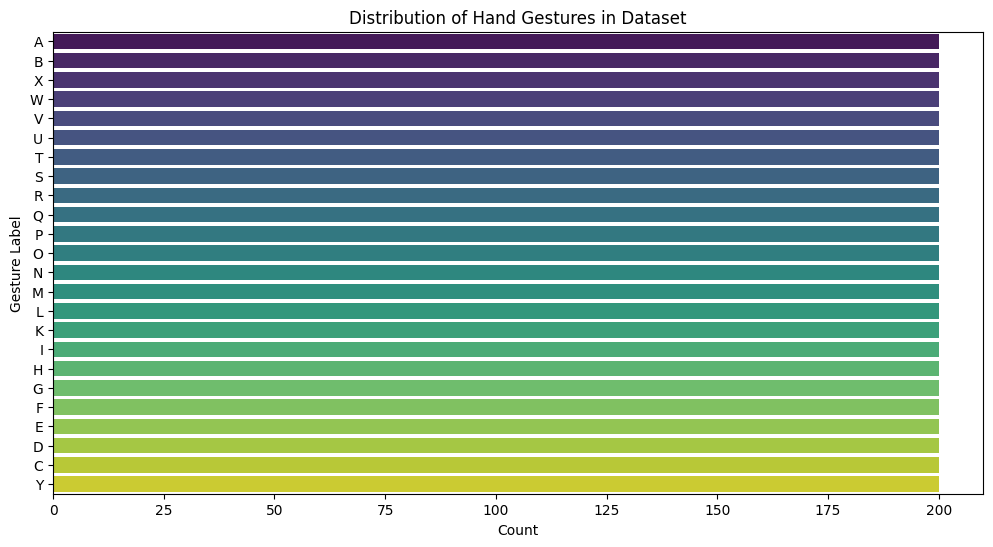

In [10]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

In [11]:
# Visualizing the different classes
def plot_hand_gesture(df, sample_index):

    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(1, 22)]
    y_coords = [sample[f'y{i}'] for i in range(1, 22)]
    y_coords = np.max(y_coords) - np.array(y_coords)

    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, color='red', label="Keypoints")
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)

    gesture_label = sample['label']

    # Display plot
    plt.title(f"Hand Gesture: {gesture_label}")
    plt.axis("equal")
    plt.legend()
    plt.show()

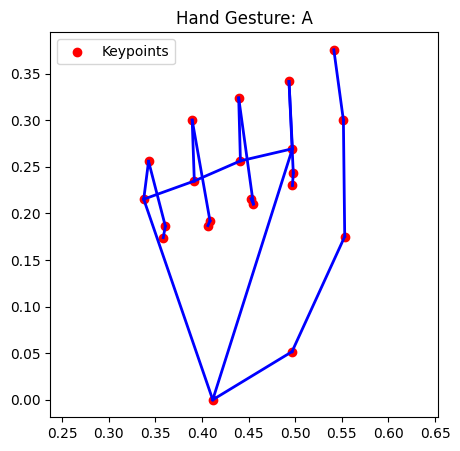

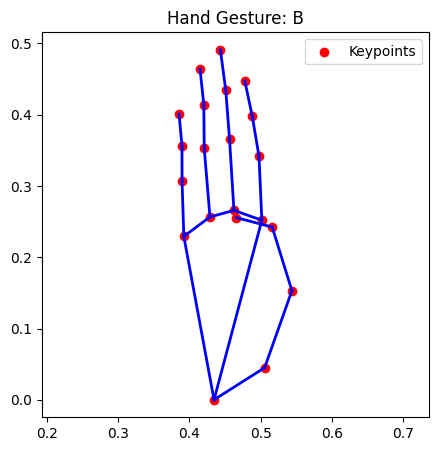

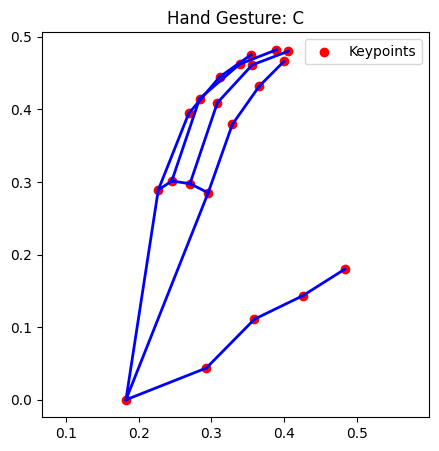

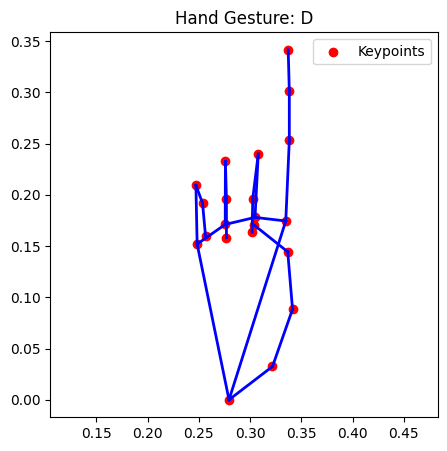

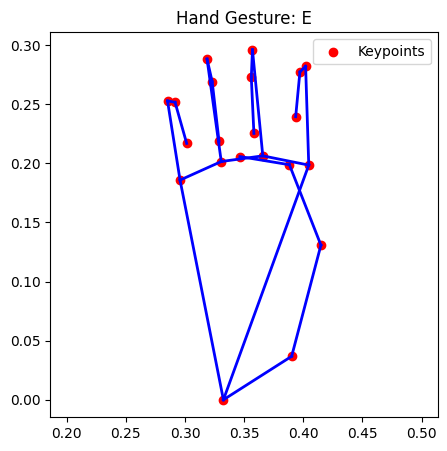

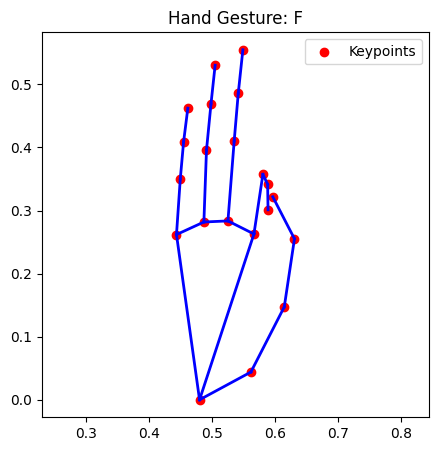

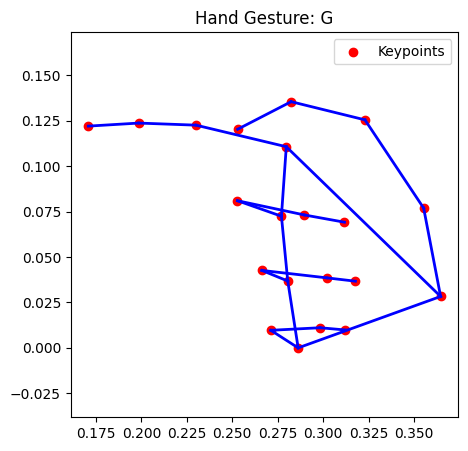

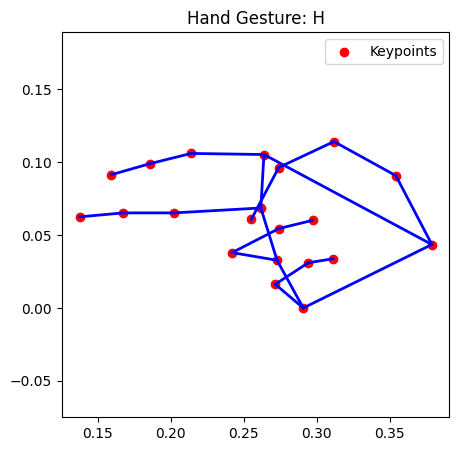

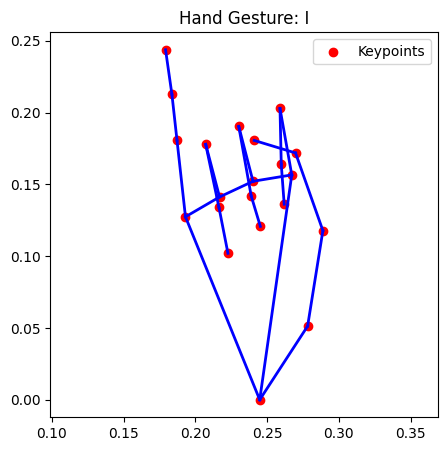

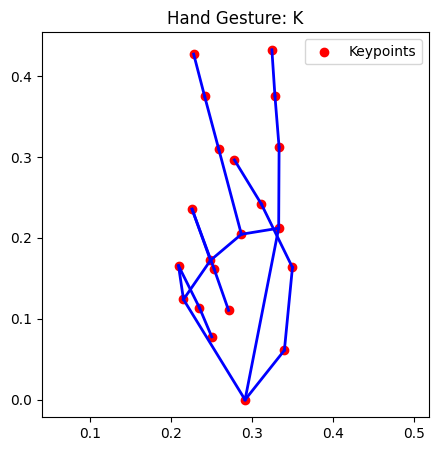

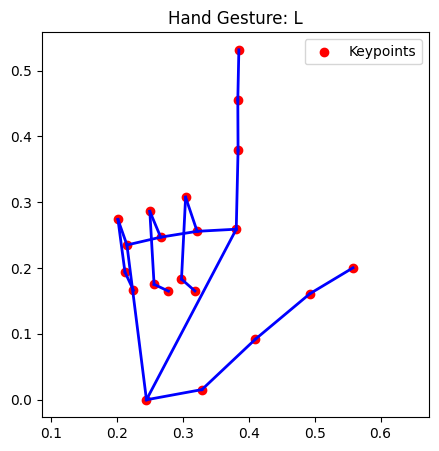

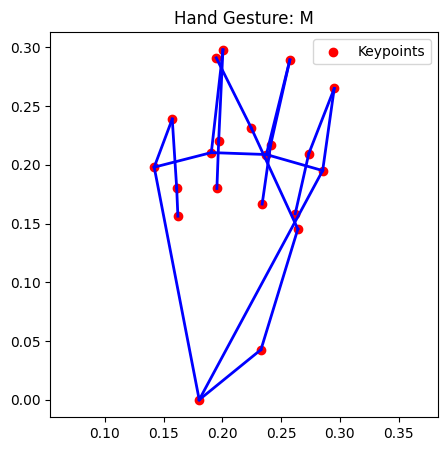

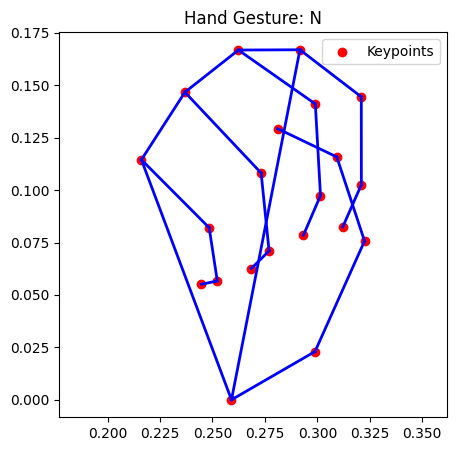

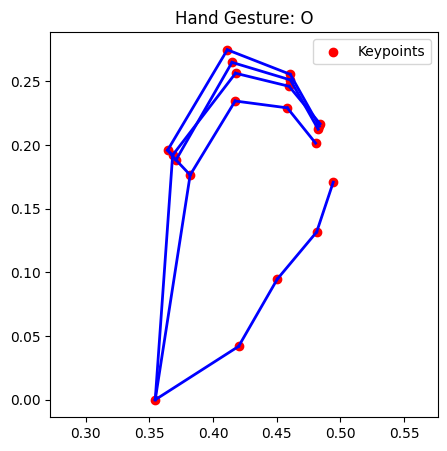

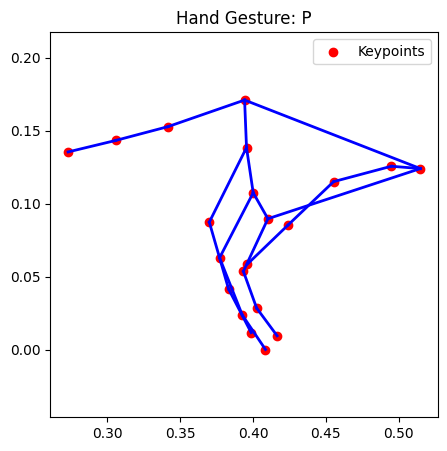

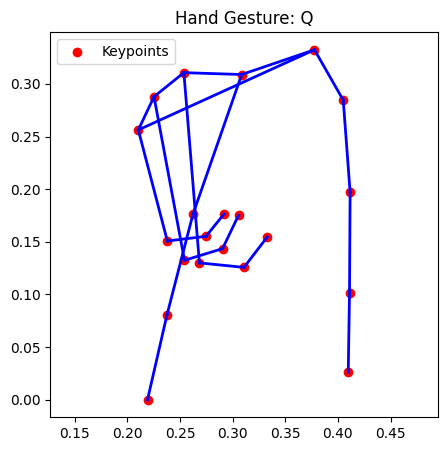

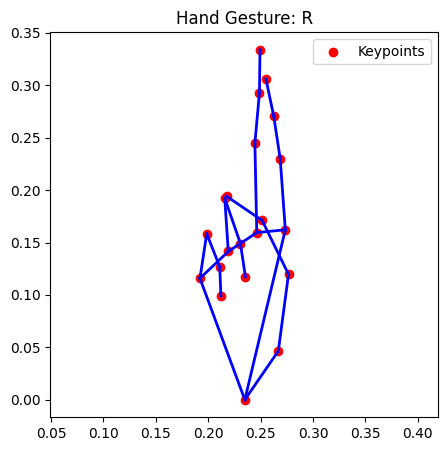

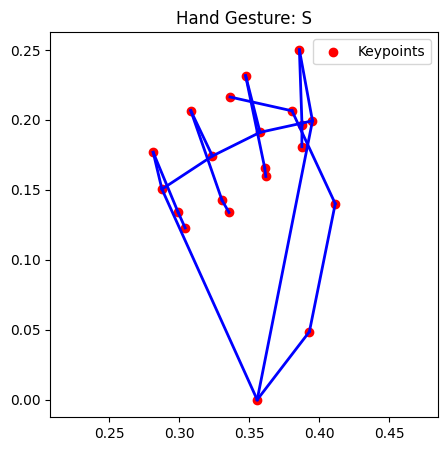

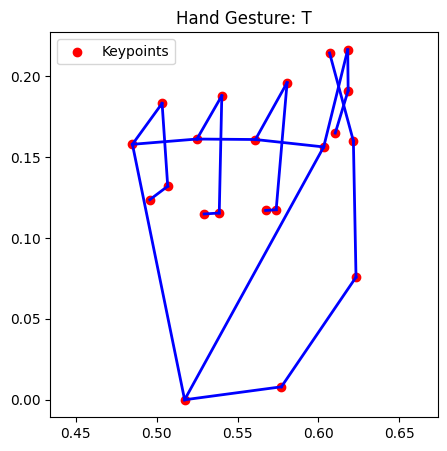

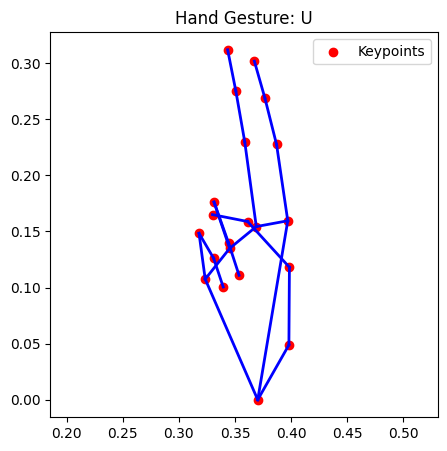

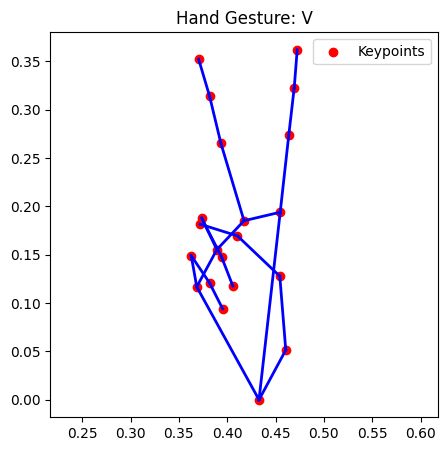

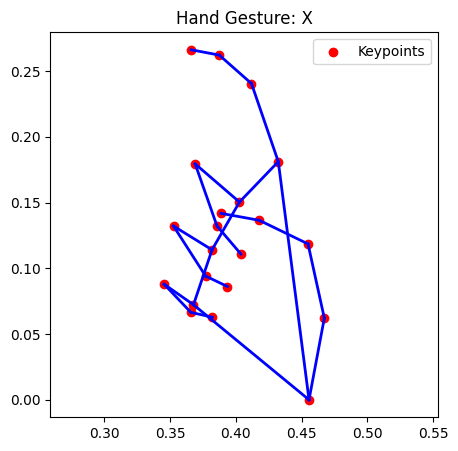

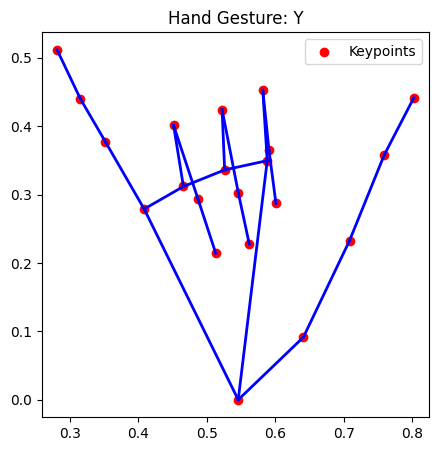

In [12]:
label_a_df = df[df['label'] == 'A']
plot_hand_gesture(label_a_df, 3)
label_b_df = df[df['label'] == 'B']
plot_hand_gesture(label_b_df, 9)
label_c_df = df[df['label'] == 'C']
plot_hand_gesture(label_c_df, 1)
label_d_df = df[df['label'] == 'D']
plot_hand_gesture(label_d_df, 3)
label_e_df = df[df['label'] == 'E']
plot_hand_gesture(label_e_df, 4)
label_f_df = df[df['label'] == 'F']
plot_hand_gesture(label_f_df, 5)
label_g_df = df[df['label'] == 'G']
plot_hand_gesture(label_g_df, 7)
label_h_df = df[df['label'] == 'H']
plot_hand_gesture(label_h_df, 8)
label_i_df = df[df['label'] == 'I']
plot_hand_gesture(label_i_df, 9)
label_k_df = df[df['label'] == 'K']
plot_hand_gesture(label_k_df, 0)
label_l_df = df[df['label'] == 'L']
plot_hand_gesture(label_l_df, 1)
label_m_df = df[df['label'] == 'M']
plot_hand_gesture(label_m_df, 2)
label_n_df = df[df['label'] == 'N']
plot_hand_gesture(label_n_df, 3)
label_o_df = df[df['label'] == 'O']
plot_hand_gesture(label_o_df, 5)
label_p_df = df[df['label'] == 'P']
plot_hand_gesture(label_p_df, 7)
label_q_df = df[df['label'] == 'Q']
plot_hand_gesture(label_q_df, 1)
label_r_df = df[df['label'] == 'R']
plot_hand_gesture(label_r_df, 9)
label_s_df = df[df['label'] == 'S']
plot_hand_gesture(label_s_df, 4)
label_t_df = df[df['label'] == 'T']
plot_hand_gesture(label_t_df, 5)
label_u_df = df[df['label'] == 'U']
plot_hand_gesture(label_u_df, 4)
label_v_df = df[df['label'] == 'V']
plot_hand_gesture(label_v_df, 6)
label_x_df = df[df['label'] == 'X']
plot_hand_gesture(label_x_df, 8)
label_y_df = df[df['label'] == 'Y']
plot_hand_gesture(label_y_df, 2)

In [13]:
# --- Check and Remove Duplicates --- # ADD THIS SECTION
num_duplicates = df.duplicated().sum()
print(f"Found {num_duplicates} duplicate rows.")
if num_duplicates > 0:
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True) # inplace=True modifies the DataFrame directly
    print(f"Shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows to remove.")

Found 4 duplicate rows.
Removing duplicate rows...
Shape after removing duplicates: (4796, 43)


In [14]:
# --- Separate Features (X) and Labels (y) ---
X = df.drop('label', axis=1).values
y_str = df['label'].values

print(f"\nFeatures (X) shape (post-deduplication): {X.shape}")
print(f"Labels (y_str) shape (post-deduplication): {y_str.shape}")
# ... (rest of Step 2 remains the same: create mappings, convert labels, split data, one-hot encode) ...


Features (X) shape (post-deduplication): (4796, 42)
Labels (y_str) shape (post-deduplication): (4796,)


In [15]:
# --- Create Numerical Label Mapping ---
unique_labels = sorted(np.unique(y_str))
num_classes = len(unique_labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
int_to_label = {i: label for i, label in enumerate(unique_labels)}
print(f"\nFound {num_classes} unique classes: {unique_labels}")
print(f"Label to Integer mapping: {label_to_int}")


Found 24 unique classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
Label to Integer mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


In [16]:
# --- Save the Label Mapping ---
try:
    with open(LABEL_MAP_FILE, 'wb') as f:
        pickle.dump(int_to_label, f)
    print(f"Integer-to-Label mapping saved to {LABEL_MAP_FILE}")
except IOError as e:
    print(f"Warning: Could not save label map file: {e}")

Integer-to-Label mapping saved to label_map.pkl


In [17]:
# --- Convert String Labels to Numerical Labels ---
y = np.array([label_to_int[label] for label in y_str])
print(f"\nNumerical labels (y) shape: {y.shape}")



Numerical labels (y) shape: (4796,)


In [18]:
# --- Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)
print(f"\nData split:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples:  {X_test.shape[0]}")


Data split:
  Training samples: 3836
  Testing samples:  960


In [19]:
# --- One-Hot Encode Numerical Labels ---
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
print(f"\nLabels after one-hot encoding:")
print(f"  y_train_cat shape: {y_train_cat.shape}")
print(f"  y_test_cat shape:  {y_test_cat.shape}")


Labels after one-hot encoding:
  y_train_cat shape: (3836, 24)
  y_test_cat shape:  (960, 24)


Building The model

In [20]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [21]:
# --- Model Configuration ---
INPUT_SHAPE = (X_train.shape[1],) # Number of features (e.g., 42)
NUM_CLASSES = num_classes         # Number of unique letters
MODEL_SAVE_PATH = 'sign_language_model.keras' # Use .keras format

In [22]:
# --- Build the Model ---
# A simple Multi-Layer Perceptron (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=INPUT_SHAPE),
    Dropout(0.3), # Helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    # Output layer: NUM_CLASSES neurons, softmax for multi-class probability distribution
    Dense(NUM_CLASSES, activation='softmax')
])

In [23]:
# --- Compile the Model ---
model.compile(optimizer='adam',                       # Adam is a good general-purpose optimizer
              loss='categorical_crossentropy',      # Suitable for one-hot encoded labels
              metrics=['accuracy'])                 # Track accuracy during training

model.summary() # Print model architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
Total params: 16632 (64.97 KB)
Trainable params: 16632 

In [24]:
# --- Callbacks for Training ---
# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [25]:
# --- Train the Model ---
EPOCHS = 100
BATCH_SIZE = 32

print("\nStarting model training...")
history = model.fit(
    X_train, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Use 20% of training data for validation during training
    callbacks=[early_stopping, reduce_lr],
    verbose=1 # Show progress bar
)

print("Model training finished.")


Starting model training...
Epoch 1/100


96/96 [==============================] - 2s 5ms/step - loss: 3.1487 - accuracy: 0.0613 - val_loss: 3.0512 - val_accuracy: 0.1224 - lr: 0.0010
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 2.9215 - accuracy: 0.1274 - val_loss: 2.5963 - val_accuracy: 0.2591 - lr: 0.0010
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 2.4937 - accuracy: 0.2272 - val_loss: 2.0050 - val_accuracy: 0.4714 - lr: 0.0010
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 1.9932 - accuracy: 0.3302 - val_loss: 1.5108 - val_accuracy: 0.5247 - lr: 0.0010
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 1.6405 - accuracy: 0.4312 - val_loss: 1.2321 - val_accuracy: 0.6315 - lr: 0.0010
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 1.4014 - accuracy: 0.4919 - val_loss: 1.0367 - val_accuracy: 0.7044 - lr: 0.0010
Epoch 7/100
96/96 [===========================

In [26]:
# --- Save the Trained Model ---
print(f"Attempting to save model to: {MODEL_SAVE_PATH}")
try:
    model.save(MODEL_SAVE_PATH)
    print(f"Model successfully saved to {MODEL_SAVE_PATH}")
except Exception as e:
    print(f"ERROR SAVING MODEL: {e}")

Attempting to save model to: sign_language_model.keras
Model successfully saved to sign_language_model.keras


In [27]:
WEIGHTS_SAVE_PATH = 'sign_language_weights.h5'
print(f"\n--- Step 3 Saving Weights ---")
try:
    model.save_weights(WEIGHTS_SAVE_PATH)
    print(f"Model weights successfully saved to {WEIGHTS_SAVE_PATH}")
    # Optional: Check file size/existence here if needed
except Exception as e:
    print(f"ERROR saving weights: {e}")


--- Step 3 Saving Weights ---
Model weights successfully saved to sign_language_weights.h5


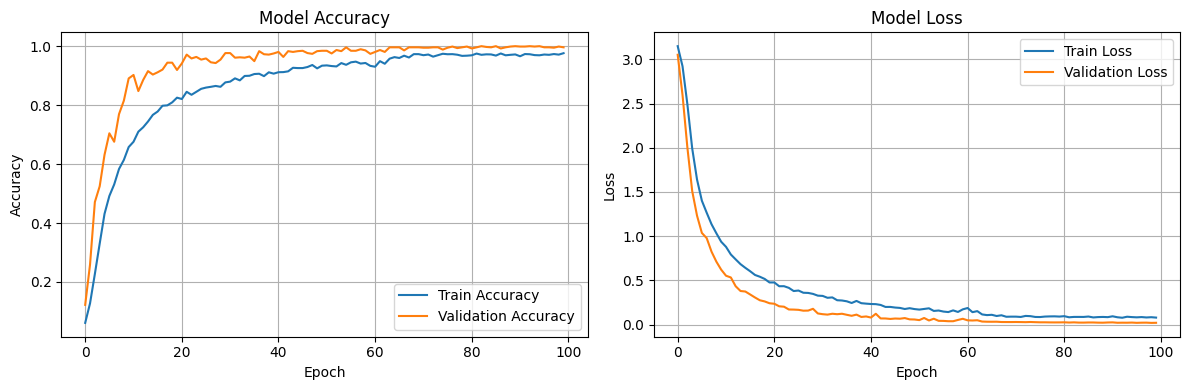

In [28]:
# --- Plot Training History ---
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history)

Evaluate with pickle

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [30]:
print("--- Step 4: Evaluation ---")

# --- Configuration ---
# Define the file paths RIGHT HERE before they are used
MODEL_PATH = 'sign_language_model.keras'
LABEL_MAP_FILE = 'label_map.pkl'
print(f"Model path set to: {MODEL_PATH}")
print(f"Label map file path set to: {LABEL_MAP_FILE}")

--- Step 4: Evaluation ---
Model path set to: sign_language_model.keras
Label map file path set to: label_map.pkl


In [31]:
# --- Load Model ---
print("Loading Keras model...")
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"Model loaded successfully from {MODEL_PATH}")
except Exception as e:
    print(f"FATAL ERROR loading model: {e}")
    exit() # Stop if model can't be loaded

Loading Keras model...
Model loaded successfully from sign_language_model.keras


In [32]:
# --- Load the INT -> LABEL mapping DIRECTLY ---
print(f"Loading label map from {LABEL_MAP_FILE}...")
try:
    # This line uses LABEL_MAP_FILE, which MUST be defined above
    with open(LABEL_MAP_FILE, 'rb') as f:
        int_to_label = pickle.load(f)
    # Get class names in the correct order
    class_names = [int_to_label[i] for i in range(len(int_to_label))]
    NUM_CLASSES = len(class_names)
    print(f"Label map loaded successfully. Classes ({NUM_CLASSES}): {class_names}")
except FileNotFoundError:
    # This line also uses LABEL_MAP_FILE
    print(f"FATAL ERROR: Label map file '{LABEL_MAP_FILE}' not found.")
    print("Please ensure 'label_map.pkl' exists in the same directory and Step 2 was run correctly.")
    exit() # Stop if the map file isn't found
except Exception as e:
     # This line also uses LABEL_MAP_FILE
     print(f"FATAL ERROR loading label map from {LABEL_MAP_FILE}: {e}")
     exit() # Stop on other loading errors

Loading label map from label_map.pkl...
Label map loaded successfully. Classes (24): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [33]:
# Note: X_test, y_test, y_test_cat should still be available from Step 2
# If running separately, reload and re-split the data as in Step 2

In [34]:
# --- Make Predictions on Test Data ---
predictions_proba = model.predict(X_test)

30/30 [==============================] - 0s 1ms/step


In [35]:
# Get the index of the highest probability class for each sample
predictions = np.argmax(predictions_proba, axis=1)

In [36]:
# y_test contains the original numerical labels (0, 1, 2...)
# We need these for comparison with predictions
y_test_indices = np.argmax(y_test_cat, axis=1) # Convert one-hot back to indices OR use y_test directly if available

In [37]:
# --- Calculate Accuracy ---
accuracy = accuracy_score(y_test_indices, predictions)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 98.23%


In [38]:
# --- Classification Report ---
# Shows precision, recall, f1-score for each class
print("\nClassification Report:")
report = classification_report(y_test_indices, predictions, target_names=class_names, zero_division=0)
print(report)


Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        40
           B       1.00      1.00      1.00        40
           C       1.00      1.00      1.00        40
           D       0.98      1.00      0.99        40
           E       1.00      1.00      1.00        40
           F       1.00      1.00      1.00        40
           G       1.00      1.00      1.00        40
           H       1.00      1.00      1.00        40
           I       1.00      1.00      1.00        40
           K       1.00      1.00      1.00        40
           L       1.00      0.97      0.99        40
           M       1.00      1.00      1.00        40
           N       1.00      1.00      1.00        40
           O       1.00      1.00      1.00        40
           P       1.00      1.00      1.00        40
           Q       1.00      1.00      1.00        40
           R       1.00      0.60      0.75        40
   

In [39]:
# --- Confusion Matrix ---
# Shows which classes are being confused with others
cm = confusion_matrix(y_test_indices, predictions)

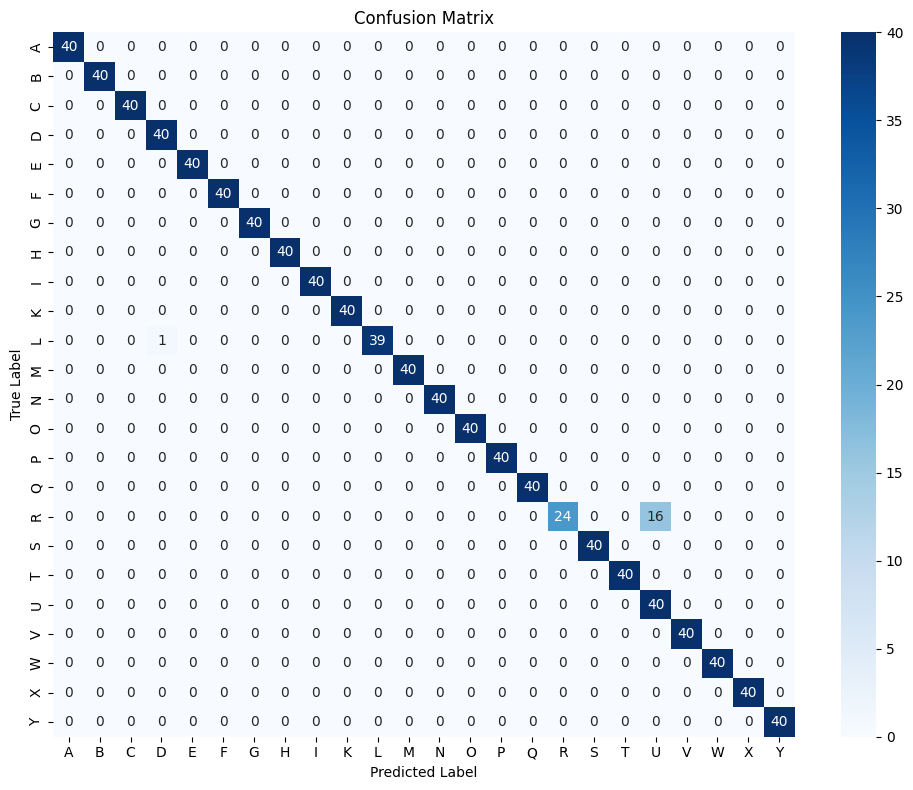

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()